In [19]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import logging, os

logging.basicConfig(level=logging.INFO)
# logging.basicConfig(level=logging.DEBUG)

BASE_PATH = "../../../../../local_data/practice/tfds/errors/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"single_pic_error"
os.system("mkdir -p " + OUTPUT_PATH)

print(BASE_PATH)
print(DATA_PATH)
print(OUTPUT_PATH)

../../../../../local_data/practice/tfds/errors/
../../../../../local_data/tfds/
../../../../../local_data/practice/tfds/errors/single_pic_error


In [20]:
# tfds.disable_progress_bar()


#trainset, validationset, test-set, metadata
(train_ds, val_ds, test_ds), metadata = tfds.load('tf_flowers',
                data_dir=DATA_PATH,
                split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                with_info=True,
                as_supervised=True,
        )
print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {val_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

INFO:absl:Load dataset info from ../../../../../local_data/tfds/tf_flowers/3.0.1
INFO:absl:Fields info.[splits, supervised_keys, module_name] from disk and from code do not match. Keeping the one from code.
INFO:absl:Reusing dataset tf_flowers (../../../../../local_data/tfds/tf_flowers/3.0.1)
INFO:absl:Constructing tf.data.Dataset tf_flowers for split ['train[:80%]', 'train[80%:90%]', 'train[90%:]'], from ../../../../../local_data/tfds/tf_flowers/3.0.1


Number of training samples: 2936
Number of validation samples: 367
Number of test samples: 367


In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    plt.imshow(images[0])
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

2025-06-30 14:52:10.342990: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    plt.imshow(images[0])
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

2025-06-30 14:52:10.415749: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2025-06-30 14:52:10.490060: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,2 (tulips)
1,,3 (sunflowers)
2,,3 (sunflowers)
3,,4 (roses)
4,,3 (sunflowers)
5,,0 (dandelion)
6,,0 (dandelion)
7,,0 (dandelion)

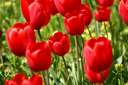
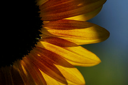
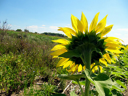
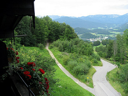
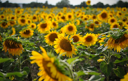
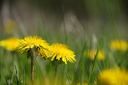
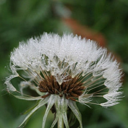
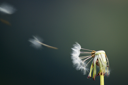

In [23]:
tfds.as_dataframe(train_ds.take(8), metadata)

In [24]:
ds = tfds.load('tf_flowers', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

INFO:absl:Load dataset info from /home/tmeng12/tensorflow_datasets/tf_flowers/3.0.1
INFO:absl:Fields info.[splits, supervised_keys, module_name] from disk and from code do not match. Keeping the one from code.
INFO:absl:Reusing dataset tf_flowers (/home/tmeng12/tensorflow_datasets/tf_flowers/3.0.1)
INFO:absl:Constructing tf.data.Dataset tf_flowers for split train, from /home/tmeng12/tensorflow_datasets/tf_flowers/3.0.1


['image', 'label']
(333, 500, 3) tf.Tensor(2, shape=(), dtype=int64)


2025-06-30 14:52:16.535787: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [25]:
train_ds = tfds.load('tf_flowers', split='train')
train_ds = train_ds.take(1)  # Only take a single example

for example in train_ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

INFO:absl:Load dataset info from /home/tmeng12/tensorflow_datasets/tf_flowers/3.0.1
INFO:absl:Fields info.[splits, supervised_keys, module_name] from disk and from code do not match. Keeping the one from code.
INFO:absl:Reusing dataset tf_flowers (/home/tmeng12/tensorflow_datasets/tf_flowers/3.0.1)
INFO:absl:Constructing tf.data.Dataset tf_flowers for split train, from /home/tmeng12/tensorflow_datasets/tf_flowers/3.0.1
2025-06-30 14:52:16.640525: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


['image', 'label']
(333, 500, 3) tf.Tensor(2, shape=(), dtype=int64)


In [26]:
# ds = tfds.load('mnist', split='train')
ds = train_ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

['image', 'label']
(333, 500, 3) tf.Tensor(2, shape=(), dtype=int64)


2025-06-30 14:52:16.700365: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2025-06-30 14:52:16.765612: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


TypeError: Image data of dtype <U1 cannot be converted to float

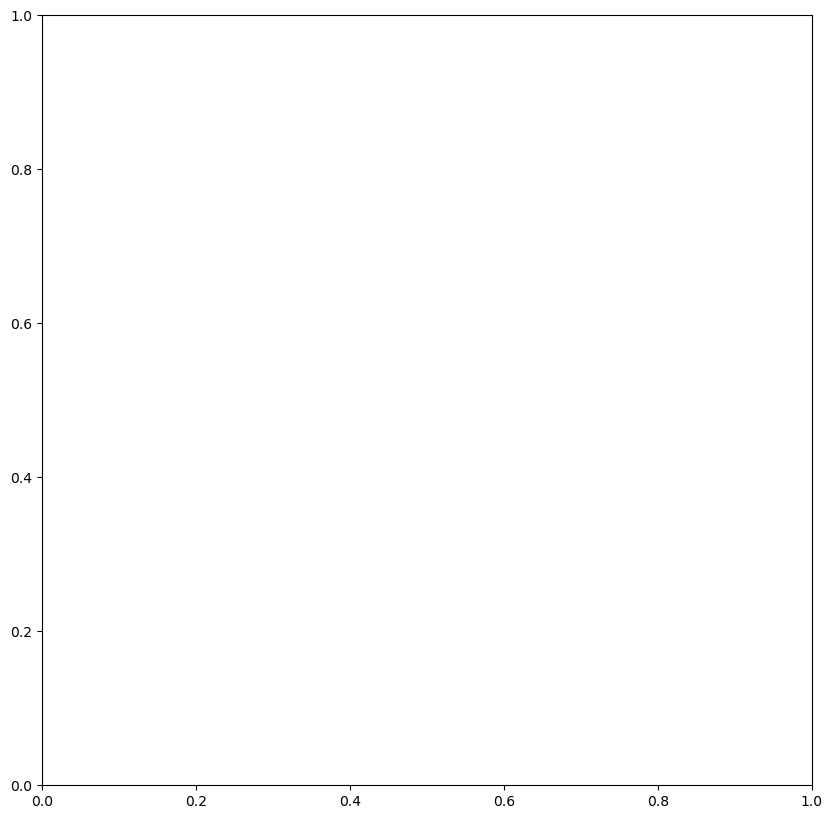

In [27]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    plt.imshow(images[0])
    # plt.title(metadata.features['label'].int2str(labels[0]))
    plt.axis("off")

In [28]:
train_ds = train_ds.take(1)

for image, label in train_ds:  # example is (image, label)
  print(image.shape, label)

2025-06-30 14:52:28.084971: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


AttributeError: 'str' object has no attribute 'shape'